In [61]:
# 3.a. Download or create any dataset and perform Exploratory data analysis
# for understanding the data and finding the hidden patterns and perform
# the following tasks
# ● Print summary statistics and write the observations if any
# ● Univariate analysis and write the observations if any
# (Example datasets: automobile/ car dataset , Loan prediction data set or
# any other)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv("imdb.csv")
df = dataset.copy()

# print(df.shape)
df.head()

,Movie,Duration,Year,Rating,Reviews
0,The Shawshank Redemption,2h 22m,1994,9.3,2.9
1,The Godfather,2h 55m,1972,9.2,2.1
2,The Dark Knight,2h 32m,2008,9.0,2.9
3,The Godfather: Part II,3h 22m,1974,9.0,1.4
4,12 Angry Men,1h 36m,1957,9.0,884.0


In [2]:
def convert_reviews(value):
    if 'M' in value:
        return int(float(value.replace('M', '')) * 1_000_000) 
    elif 'K' in value:
        return int(float(value.replace('K', '')) * 1_000) 
    else:
        return int(value)

df['Reviews'] = df['Reviews'].apply(convert_reviews)

df.head()

TypeError: argument of type 'float' is not iterable

In [15]:
summary_stats = df.describe()
print(summary_stats)

df.describe(include=[object])


              Year     Rating  Reviews
count    25.000000  25.000000      0.0
mean   1988.440000   8.816000      NaN
std      18.175258   0.195107      NaN
min    1946.000000   8.600000      NaN
25%    1975.000000   8.700000      NaN
50%    1994.000000   8.800000      NaN
75%    2001.000000   9.000000      NaN
max    2014.000000   9.300000      NaN


,Movie,Duration
count,25,25
unique,25,22
top,The Shawshank Redemption,2h 22m
freq,1,2


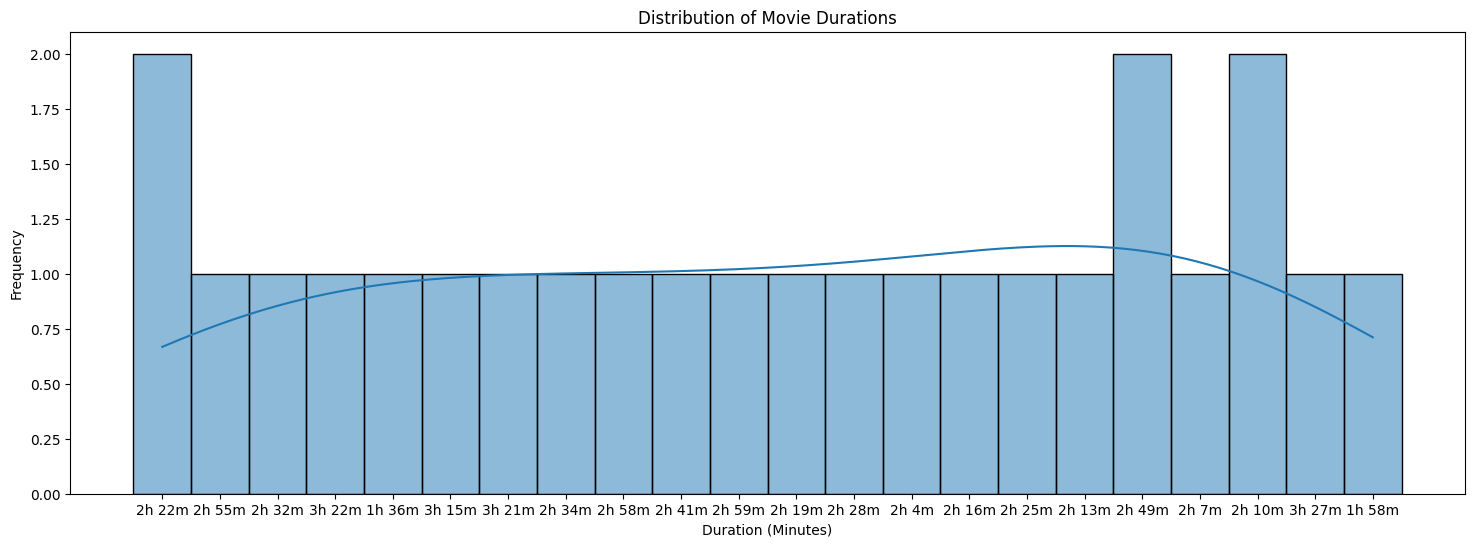

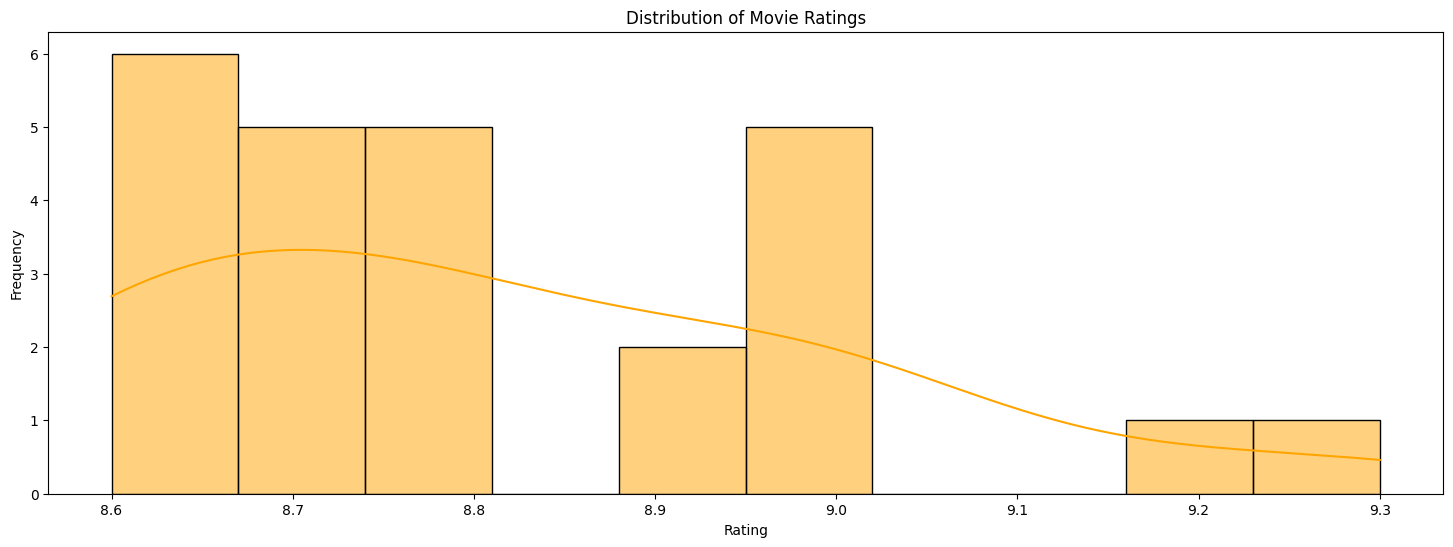

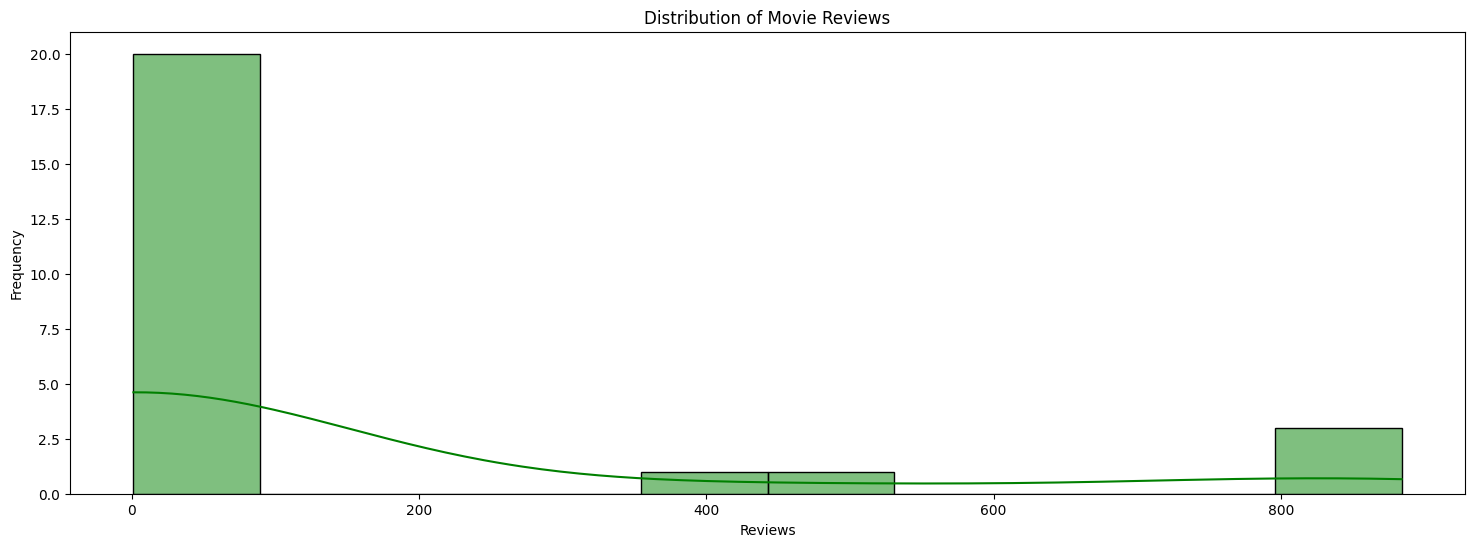

In [4]:
plt.figure(figsize=(18, 6))
sns.histplot(df['Duration'], bins=10, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(df['Rating'], bins=10, kde=True, color='orange')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(18, 6))
sns.histplot(df['Reviews'], bins=10, kde=True, color='Green')
plt.title('Distribution of Movie Reviews')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

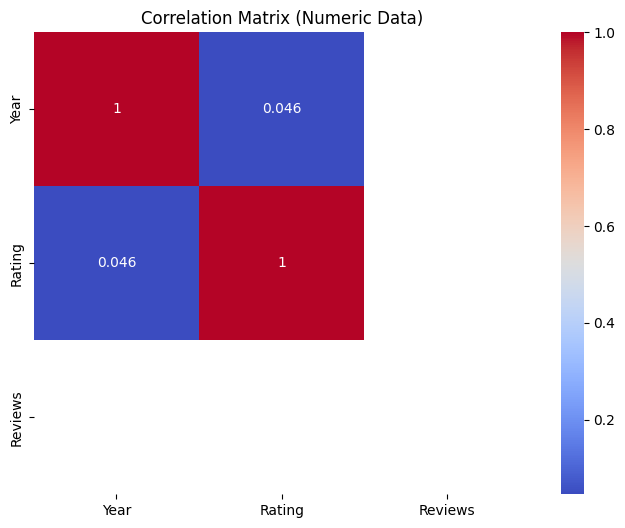

In [21]:
numeric_df = df.select_dtypes(include=[np.number])

corr = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Data)')
plt.show()

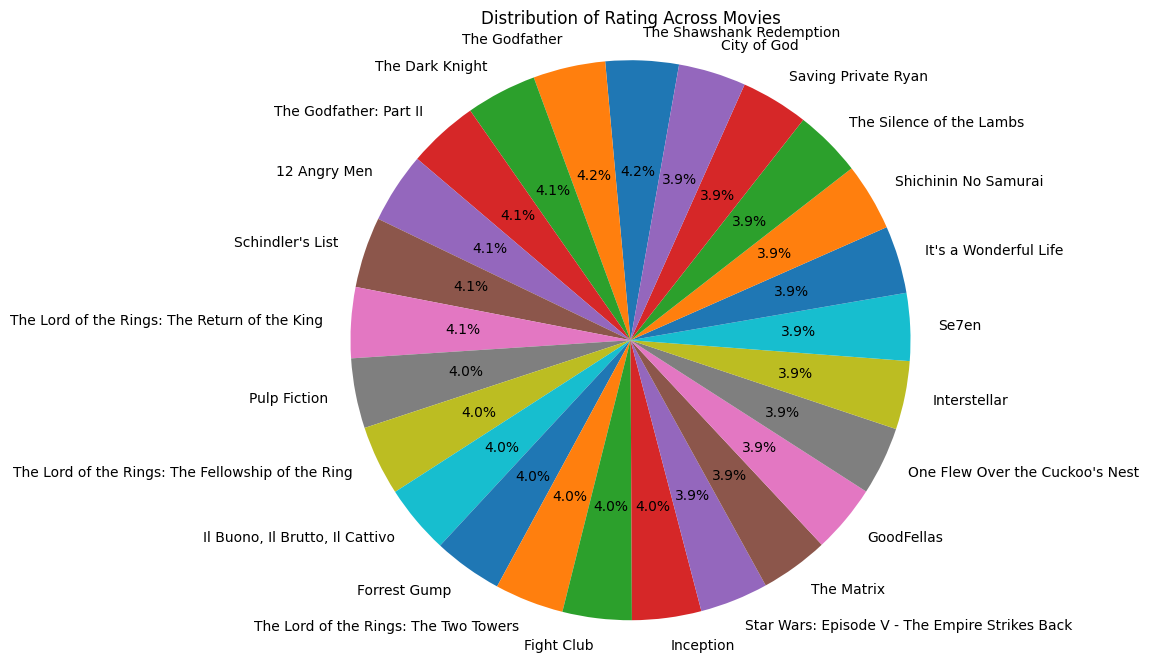

In [32]:
plt.figure(figsize=(10, 8))

labels = df['Movie']
sizes = df['Rating']

plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=80)

plt.title('Distribution of Rating Across Movies')

plt.axis('equal')

plt.show()

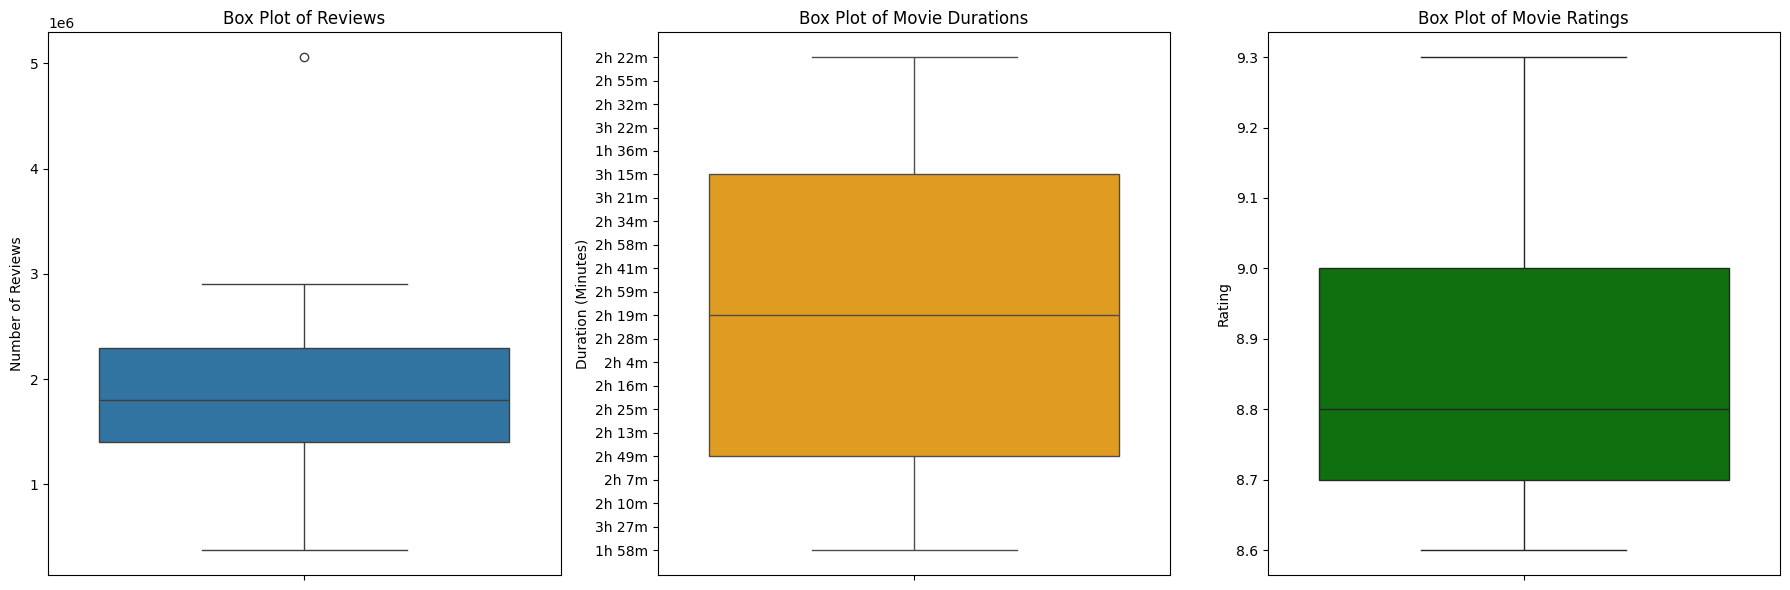

In [71]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Reviews'])
plt.title('Box Plot of Reviews')
plt.ylabel('Number of Reviews')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['Duration'], color='orange')
plt.title('Box Plot of Movie Durations')
plt.ylabel('Duration (Minutes)')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Rating'], color='green')
plt.title('Box Plot of Movie Ratings')
plt.ylabel('Rating')

plt.tight_layout()
plt.show()


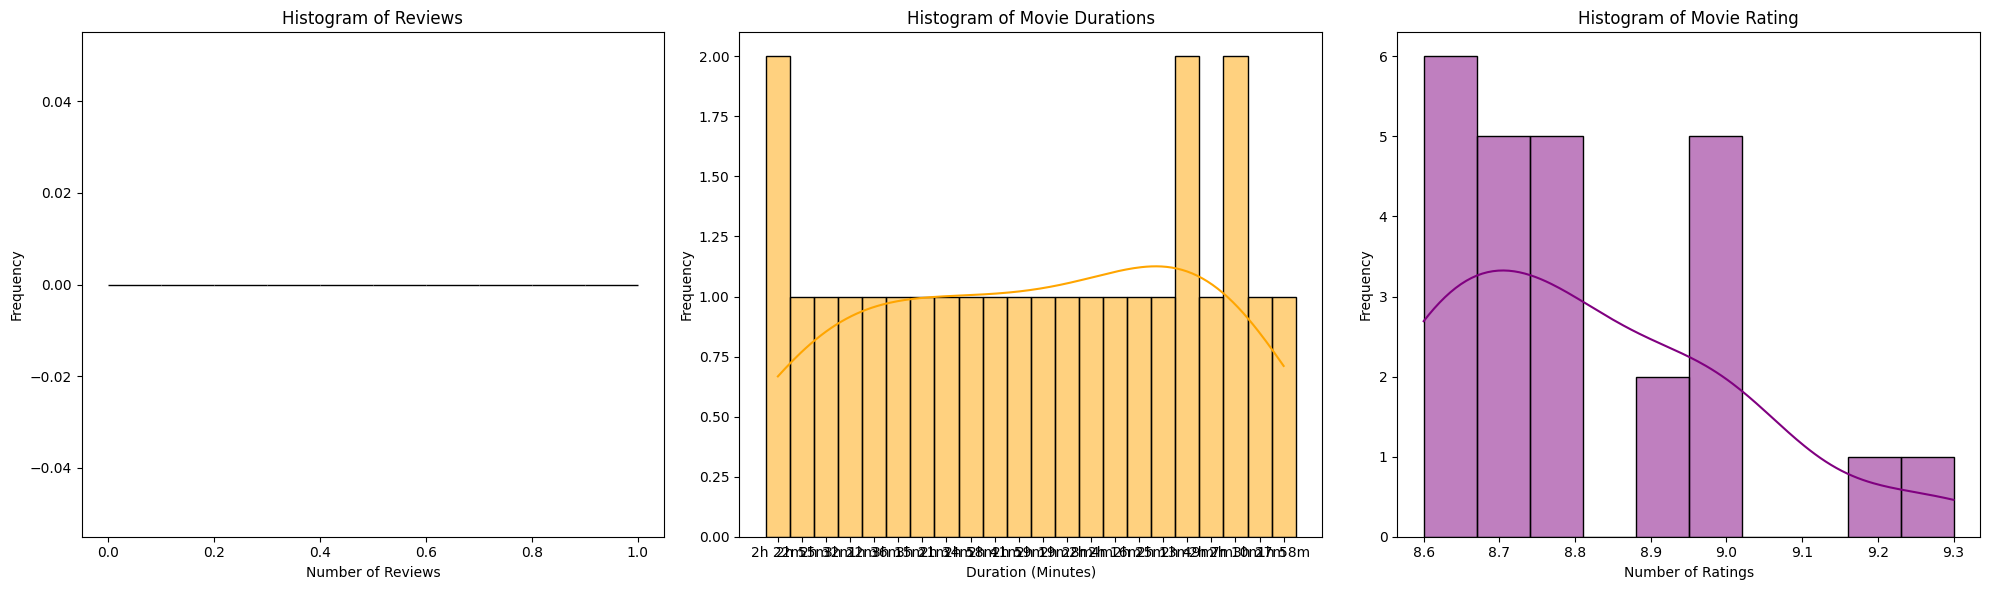

In [33]:
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Reviews'], bins=10, kde=True)
plt.title('Histogram of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.histplot(df['Duration'], bins=10, kde=True, color='orange')
plt.title('Histogram of Movie Durations')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(df['Rating'], bins=10, kde=True, color='purple')
plt.title('Histogram of Movie Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

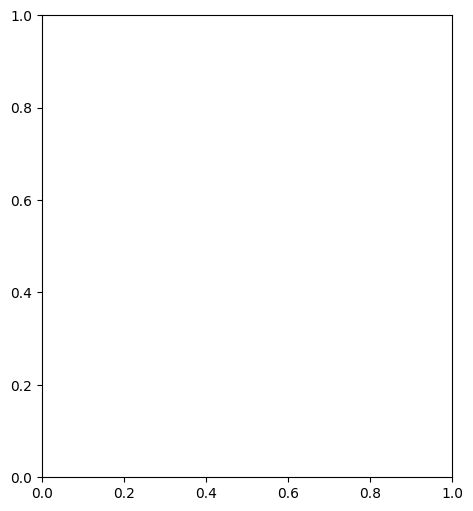

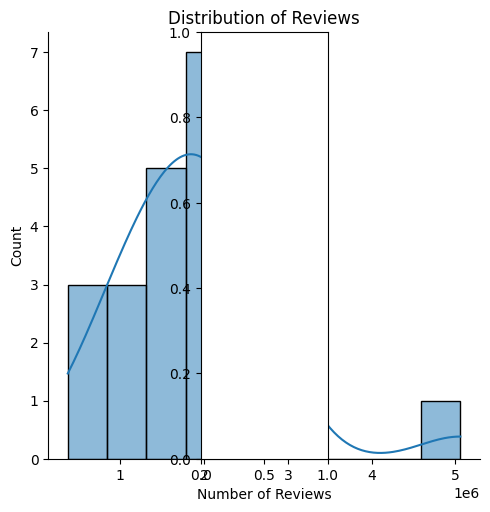

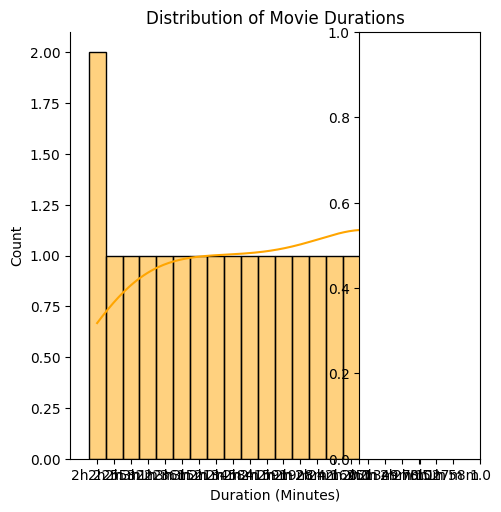

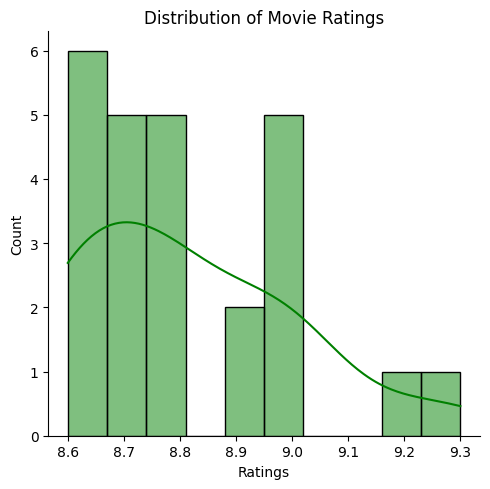

In [75]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.displot(df['Reviews'], bins=10, kde=True)
plt.title('Distribution of Reviews')
plt.xlabel('Number of Reviews')

plt.subplot(1, 3, 2)
sns.displot(df['Duration'], bins=10, kde=True, color='orange')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (Minutes)')

plt.subplot(1, 3, 3)
sns.displot(df['Rating'], bins=10, kde=True, color='green')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Ratings')

plt.tight_layout()
plt.show()